In [9]:
import os
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/mesothelioma-data/Mesothelioma  (1).csv')


In [3]:
df.head()
df.info()
df.describe()
df.columns
df['class of diagnosis'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               324 non-null    float64
 1   gender                            324 non-null    int64  
 2   city                              324 non-null    int64  
 3   asbestos exposure                 324 non-null    int64  
 4   type of MM                        324 non-null    float64
 5   duration of asbestos exposure     324 non-null    float64
 6   diagnosis method                  324 non-null    int64  
 7   keep side                         324 non-null    int64  
 8   cytology                          324 non-null    int64  
 9   duration of symptoms              324 non-null    float64
 10  dyspnoea                          324 non-null    int64  
 11  ache on chest                     324 non-null    int64  
 12  weakness

array([1, 2])

In [4]:
dtypes_df = df.dtypes.reset_index()
dtypes_df.columns = ['Column', ' Type']
dtypes_df

,Column,Type
0,age,float64
1,gender,int64
2,city,int64
3,asbestos exposure,int64
4,type of MM,float64
5,duration of asbestos exposure,float64
6,diagnosis method,int64
7,keep side,int64
8,cytology,int64
9,duration of symptoms,float64


In [5]:
df.shape

(324, 35)

In [6]:
df.duplicated().sum()

0

In [7]:
mv = df.isnull().sum().reset_index()
mv.columns = ['Column', 'Missing Values']
mv

,Column,Missing Values
0,age,0
1,gender,0
2,city,0
3,asbestos exposure,0
4,type of MM,0
5,duration of asbestos exposure,0
6,diagnosis method,0
7,keep side,0
8,cytology,0
9,duration of symptoms,0


In [8]:
df.describe()

,age,gender,city,asbestos exposure,type of MM,duration of asbestos exposure,diagnosis method,keep side,cytology,duration of symptoms,...,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,dead or not,pleural effusion,pleural thickness on tomography,pleural level of acidity (pH),C-reactive protein (CRP),class of diagnosis
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,...,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,54.743827,0.586420,2.530864,0.864198,0.052469,30.188272,0.703704,0.759259,0.280864,5.442901,...,518.472222,3.937562,2.076883,48.444444,0.944444,0.870370,0.595679,0.521605,64.188272,1.296296
std,11.002637,0.493237,2.429623,0.343109,0.261622,16.419945,0.457330,0.565308,0.450116,4.717792,...,536.279128,1.575008,0.915411,27.232516,0.229416,0.336415,0.491519,0.500306,22.661837,0.457330
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,110.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000
25%,47.000000,0.000000,0.000000,1.000000,0.000000,19.750000,0.000000,0.000000,0.000000,2.875000,...,322.000000,3.400000,1.607500,29.000000,1.000000,1.000000,0.000000,0.000000,42.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,0.000000,34.000000,1.000000,1.000000,0.000000,5.000000,...,510.000000,4.200000,2.200000,38.000000,1.000000,1.000000,1.000000,1.000000,68.000000,1.000000
75%,63.000000,1.000000,5.000000,1.000000,0.000000,43.000000,1.000000,1.000000,1.000000,7.000000,...,545.000000,4.925000,2.725000,75.000000,1.000000,1.000000,1.000000,1.000000,79.000000,2.000000
max,85.000000,1.000000,8.000000,1.000000,2.000000,70.000000,1.000000,2.000000,1.000000,52.000000,...,7541.000000,6.700000,4.400000,151.000000,1.000000,1.000000,1.000000,1.000000,103.000000,2.000000


In [9]:
df['age'] = df['age'].astype('int64')

In [10]:
df.head()

,age,gender,city,asbestos exposure,type of MM,duration of asbestos exposure,diagnosis method,keep side,cytology,duration of symptoms,...,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,dead or not,pleural effusion,pleural thickness on tomography,pleural level of acidity (pH),C-reactive protein (CRP),class of diagnosis
0,47,1,0,1,0.0,20.0,1,0,1,24.0,...,289.0,0.0,0.00,79.0,1,0.0,0.0,0.0,34,1
1,55,1,0,1,0.0,45.0,1,0,0,1.0,...,7541.0,1.6,0.80,6.0,1,1.0,1.0,1.0,42,1
2,29,1,1,1,0.0,23.0,0,1,0,1.0,...,480.0,0.0,0.00,90.0,1,0.0,0.0,0.0,43,2
3,39,1,0,1,0.0,10.0,1,0,0,3.0,...,459.0,5.0,2.80,45.0,1,1.0,0.0,0.0,21,1
4,47,1,0,1,0.0,10.0,1,1,1,1.5,...,213.0,3.6,1.95,53.0,1,1.0,0.0,0.0,11,1


In [11]:
pd.set_option('display.max_columns', None)
numerical_columns = df.select_dtypes(include=['float64'])
correlation_matrix = numerical_columns.corr()
correlation_matrix

,type of MM,duration of asbestos exposure,duration of symptoms,white blood,platelet count (PLT),sedimentation,blood lactic dehydrogenise (LDH),alkaline phosphatise (ALP),total protein,albumin,glucose,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,pleural effusion,pleural thickness on tomography,pleural level of acidity (pH)
type of MM,1.000000,0.033728,0.006197,0.072072,0.023086,-0.023751,0.021314,-0.046820,-0.102453,-0.145815,-0.033529,-0.017477,-0.152738,-0.157804,-0.038916,-0.133539,0.093257,-0.067820
duration of asbestos exposure,0.033728,1.000000,-0.013049,-0.000099,-0.005886,0.036225,-0.034354,0.036644,-0.082471,-0.061756,0.026358,-0.041549,0.104646,0.097590,-0.074853,0.082897,-0.007034,0.143656
duration of symptoms,0.006197,-0.013049,1.000000,0.020279,0.013912,-0.137066,0.095395,-0.004686,0.022083,-0.024305,-0.026341,-0.108569,0.025224,0.056226,-0.046732,0.020681,-0.009987,0.026430
white blood,0.072072,-0.000099,0.020279,1.000000,0.110055,0.107560,0.077583,0.148830,0.009625,-0.133798,0.074182,0.038043,0.036681,0.055332,-0.063267,-0.016004,0.034759,-0.048996
platelet count (PLT),0.023086,-0.005886,0.013912,0.110055,1.000000,0.078358,0.337259,0.195140,0.010035,-0.083529,0.033351,0.221915,0.162895,0.102754,-0.275164,0.164736,0.170796,0.268759
sedimentation,-0.023751,0.036225,-0.137066,0.107560,0.078358,1.000000,0.044402,0.069903,-0.151896,-0.075471,-0.069894,0.069196,0.108197,0.085935,-0.127097,0.146323,0.132004,0.073187
blood lactic dehydrogenise (LDH),0.021314,-0.034354,0.095395,0.077583,0.337259,0.044402,1.000000,0.183896,-0.067995,-0.012893,0.005009,0.163661,0.156524,0.136480,-0.460015,0.224294,0.304444,0.402273
alkaline phosphatise (ALP),-0.046820,0.036644,-0.004686,0.148830,0.195140,0.069903,0.183896,1.000000,-0.099987,-0.071840,0.085220,0.134255,0.016605,0.022800,0.032432,-0.012103,-0.007106,0.014000
total protein,-0.102453,-0.082471,0.022083,0.009625,0.010035,-0.151896,-0.067995,-0.099987,1.000000,0.416290,0.091128,-0.077200,-0.055496,-0.039333,0.125353,-0.127317,-0.070610,-0.109853
albumin,-0.145815,-0.061756,-0.024305,-0.133798,-0.083529,-0.075471,-0.012893,-0.071840,0.416290,1.000000,-0.052796,-0.026389,0.032998,0.103462,-0.035555,-0.025988,-0.047945,-0.057367


In [12]:
# hna rani n'compter ch7al men échantillon kayen f chaque classe (par exemple classe 0, 1, etc.)
class_counts = df["class of diagnosis"].value_counts()

# n'afficher les résultats : nombre d'échantillons f chaque classe
print(" Nombre d'échantillons par classe :")
print(class_counts)

# hna ndir le calcul des proportions (pourcentage) ta3 chaque classe
# normalize=True dir lina la proportion au lieu du nombre
# * 100 bach ndirha en pourcentage
class_proportions = df["class of diagnosis"].value_counts(normalize=True) * 100

# n'afficher les pourcentages ta3 les classes
print("\n Proportion des classes (%):")
print(class_proportions)


 Nombre d'échantillons par classe :
class of diagnosis
1    228
2     96
Name: count, dtype: int64

 Proportion des classes (%):
class of diagnosis
1    70.37037
2    29.62963
Name: proportion, dtype: float64


In [13]:
# hna rani n'importi l'algorithme Isolation Forest men sklearn
from sklearn.ensemble import IsolationForest

# hna nchoof les colonnes numériques (float ou int) bach nkhdem bihom
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# ki ykoun 'class of diagnosis' parmi les colonnes numériques, nhiyha parce qu'on veut pas l'utiliser f la détection
if 'class of diagnosis' in numerical_columns:
    numerical_columns.remove('class of diagnosis')

# ncréé un modèle Isolation Forest pour détecter les outliers (valeurs anormales)
# contamination=0.05 ya3ni n'estime que 5% des données houma des outliers
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# n'applique le modèle 3la les colonnes numériques, w n'ajoute une colonne 'outlier'
# -1 ya3ni outlier, 1 ya3ni normal
df["outlier"] = iso_forest.fit_predict(df[numerical_columns])

# ncompter nombre d'outliers détectés
outlier_count = (df["outlier"] == -1).sum()
print(f"Nombre d'outliers détectés : {outlier_count}")

# sauvegarder taille du DataFrame avant suppression
taille_avant = df.shape[0]

# nsupprimer les lignes li fihom outliers (li 'outlier' = -1)
df = df[df["outlier"] != -1]

# nhiy colonne 'outlier' parce qu'on en a plus besoin
df = df.drop(columns=["outlier"])

# sauvegarder taille du DataFrame après suppression
taille_apres = df.shape[0]

# afficher les tailles avant/après
print(f"Taille avant suppression : {taille_avant} lignes")
print(f"Taille après suppression : {taille_apres} lignes")
print(f"Nombre de lignes restantes après suppression : {taille_apres}")


Nombre d'outliers détectés : 17
Taille avant suppression : 324 lignes
Taille après suppression : 307 lignes
Nombre de lignes restantes après suppression : 307


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [14]:
# n'importiw les bibliothèques nécessaires
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib  # bach n'khdmo save lel scaler si on veut l'utiliser plus tard

# df c'est le DataFrame li fih les données (m3a les colonnes w les valeurs)

# hna ndefiniw les colonnes qu'on veut *exclure* de la normalisation
# parce qu'elles sont catégoriques, ou bien déjà dans un format spécifique
exclude_cols = [
    'gender', 'dead or not', 'hemoglobin (HGB)', 'performance status', 'weakness',
    'ache on chest', 'dyspnoea', 'cytology', 'diagnosis method', 'asbestos exposure',
    'age', 'class of diagnosis'
]

# hna ndiro liste ta3 les colonnes continues li b9aw (li rahoum pas dans exclude_cols)
continuous_cols = [col for col in df.columns if col not in exclude_cols]

# n'initialiser le scaler ta3 MinMax (ydir les valeurs entre 0 w 1)
scaler = MinMaxScaler()

# ndir une copie du DataFrame original (bach n'khalli l'original intact)
df_normalized = df.copy()

# n'appliquer la normalisation seulement sur les colonnes continues
df_normalized[continuous_cols] = scaler.fit_transform(df[continuous_cols])

# afficher les statistiques (min, max, moyenne, etc.) ta3 les colonnes normalisées
print("\nStatistiques des colonnes normalisées :")
print(df_normalized[continuous_cols].describe())



Statistiques des colonnes normalisées :
             city  type of MM  duration of asbestos exposure   keep side  \
count  307.000000  307.000000                     307.000000  307.000000   
mean     0.312296    0.016287                       0.470960    0.377850   
std      0.299846    0.105697                       0.246921    0.275167   
min      0.000000    0.000000                       0.000000    0.000000   
25%      0.000000    0.000000                       0.307692    0.000000   
50%      0.250000    0.000000                       0.523077    0.500000   
75%      0.500000    0.000000                       0.661538    0.500000   
max      1.000000    1.000000                       1.000000    1.000000   

       duration of symptoms  habit of cigarette  white blood  \
count            307.000000          307.000000   307.000000   
mean               0.096044            0.300760     0.416673   
std                0.091759            0.382567     0.163809   
min               

In [15]:
df_normalized.head()

,age,gender,city,asbestos exposure,type of MM,duration of asbestos exposure,diagnosis method,keep side,cytology,duration of symptoms,dyspnoea,ache on chest,weakness,habit of cigarette,performance status,white blood,cell count (WBC),hemoglobin (HGB),platelet count (PLT),sedimentation,blood lactic dehydrogenise (LDH),alkaline phosphatise (ALP),total protein,albumin,glucose,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,dead or not,pleural effusion,pleural thickness on tomography,pleural level of acidity (pH),C-reactive protein (CRP),class of diagnosis
0,47,1,0.000,1,0.0,0.307692,1,0.0,1,0.456311,1,1,0,0.666667,1,0.352057,0.277778,1,0.050558,0.460870,0.189189,0.166667,0.722222,0.314815,0.168539,0.023168,0.000000,0.000000,0.654867,1,0.0,0.0,0.0,0.250000,1
1,55,1,0.000,1,0.0,0.692308,1,0.0,0,0.009709,1,1,1,1.000000,0,0.503806,0.166667,0,0.156328,0.686957,0.443616,0.388889,0.425926,0.203704,0.134831,1.000000,0.238806,0.181818,0.008850,1,1.0,1.0,1.0,0.336957,1
2,29,1,0.125,1,0.0,0.353846,0,0.5,0,0.009709,0,0,0,0.666667,1,0.219578,0.444444,1,0.024194,0.200000,0.137931,0.215278,0.722222,0.370370,0.123596,0.048895,0.000000,0.000000,0.752212,1,0.0,0.0,0.0,0.347826,2
3,39,1,0.000,1,0.0,0.153846,1,0.0,0,0.048544,0,1,1,0.000000,1,0.345313,0.555556,1,0.108871,0.182609,0.132339,0.062500,0.907407,0.555556,0.123596,0.046067,0.746269,0.636364,0.353982,1,1.0,0.0,0.0,0.108696,1
4,47,1,0.000,1,0.0,0.153846,1,0.5,1,0.019417,1,1,0,1.000000,1,0.403603,0.000000,0,0.129963,0.556522,0.117428,0.131944,0.574074,0.425926,0.086142,0.012931,0.537313,0.443182,0.424779,1,1.0,0.0,0.0,0.000000,1


In [16]:
df_normalized.dtypes

age                                   int64
gender                                int64
city                                float64
asbestos exposure                     int64
type of MM                          float64
duration of asbestos exposure       float64
diagnosis method                      int64
keep side                           float64
cytology                              int64
duration of symptoms                float64
dyspnoea                              int64
ache on chest                         int64
weakness                              int64
habit of cigarette                  float64
performance status                    int64
white blood                         float64
cell count (WBC)                    float64
hemoglobin (HGB)                      int64
platelet count (PLT)                float64
sedimentation                       float64
blood lactic dehydrogenise (LDH)    float64
alkaline phosphatise (ALP)          float64
total protein                   

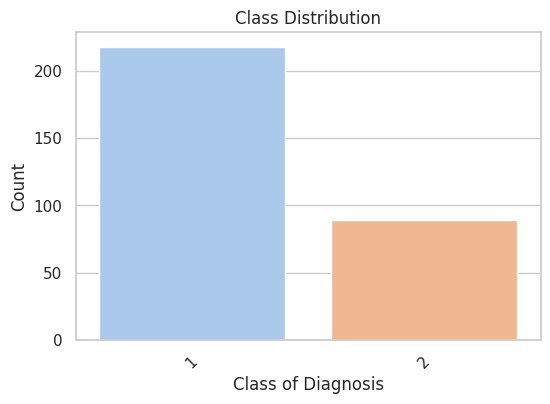

In [17]:
# n'importiw les bibliothèques de visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# nsettiw le style graphique de seaborn (fond blanc avec grille)
sns.set(style="whitegrid")

# ndir une figure avec une taille de 6x4
plt.figure(figsize=(6, 4))

# nhseb ch7al men échantillon kayen f chaque classe (dans la colonne 'class of diagnosis')
class_counts = df_normalized["class of diagnosis"].value_counts()

# ncréé un barplot (diagramme en barres) li ybayan la répartition des classes
sns.barplot(x=class_counts.index, y=class_counts.values, palette="pastel")

# nsettiw les labels w le titre
plt.xlabel("Class of Diagnosis")  # label de l'axe des x
plt.ylabel("Count")               # label de l'axe des y
plt.title("Class Distribution")   # titre du graphique

# rotation des labels de l’axe X si les classes sont longues
plt.xticks(rotation=45)

# naffichi le graphique
plt.show()


In [18]:
X = df_normalized.drop(columns=["class of diagnosis"])
y = df_normalized["class of diagnosis"]
# random_state=42 : bach la division soit reproductible (fixée)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"🔹 Nombre total d'échantillons dans Train : {len(y_train)}")
print(f"🔹 Nombre total d'échantillons dans Test : {len(y_test)}")

🔹 Nombre total d'échantillons dans Train : 245
🔹 Nombre total d'échantillons dans Test : 62


In [19]:
train_class_distribution = y_train.value_counts(normalize=True)
test_class_distribution = y_test.value_counts(normalize=True)
print("Distribution des classes dans Train:", train_class_distribution)
print("Distribution des classes dans Test:", test_class_distribution)

Distribution des classes dans Train: class of diagnosis
1    0.734694
2    0.265306
Name: proportion, dtype: float64
Distribution des classes dans Test: class of diagnosis
1    0.612903
2    0.387097
Name: proportion, dtype: float64


In [20]:
train_path = "train_data.csv"
test_path = "test_data.csv"
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
train_data.to_csv(train_path, index=False)
test_data.to_csv(test_path, index=False)
print(f" Fichiers enregistrés : {train_path}, {test_path}")


 Fichiers enregistrés : train_data.csv, test_data.csv


In [21]:
param_grid = {
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"], "metric": ["euclidean", "manhattan", "minkowski"]}
    },
    "SVM": {
        "model": SVC(),
        "params": {"C": [0.1, 1, 10, 100], "kernel": ["linear", "rbf", "poly", "sigmoid"]}
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5, 7]}
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {"C": [0.1, 1, 10]}
    }
}

best_models = {}
best_scores = {}

for name, config in param_grid.items():
    grid_search = GridSearchCV(config["model"], config["params"], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_models[name] = grid_search.best_estimator_
    best_scores[name] = grid_search.best_score_

    print("=" * 60)
    print(f"{name} - Best score: {grid_search.best_score_:.4f}")
    print(f"Best parameters: {grid_search.best_params_}")
    print("=" * 60)

print("\nÉvaluation des modèles sélectionnés :")
for name, model in best_models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} - Accuracy moyenne: {scores.mean():.4f}, Écart-type: {scores.std():.4f}")

KNN - Best score: 0.8327
Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
SVM - Best score: 1.0000
Best parameters: {'C': 0.1, 'kernel': 'linear'}
Random Forest - Best score: 1.0000
Best parameters: {'max_depth': None, 'n_estimators': 50}
Gradient Boosting - Best score: 1.0000
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Logistic Regression - Best score: 1.0000
Best parameters: {'C': 1}

Évaluation des modèles sélectionnés :
KNN - Accuracy moyenne: 0.8327, Écart-type: 0.0238
SVM - Accuracy moyenne: 1.0000, Écart-type: 0.0000
Random Forest - Accuracy moyenne: 1.0000, Écart-type: 0.0000
Gradient Boosting - Accuracy moyenne: 1.0000, Écart-type: 0.0000
Logistic Regression - Accuracy moyenne: 1.0000, Écart-type: 0.0000


In [22]:
# ndirou boucle 3la koul modèle men les meilleurs modèles (best_models)
for name, model in best_models.items():
    # nprédictiw les classes 3la X_test
    y_pred = model.predict(X_test)
    
    # ncalculiw l'accuracy ta3 les prédictions
    acc = accuracy_score(y_test, y_pred)
    
    # naffichiw l'accuracy ta3 le modèle
    print(f"{name} - Accuracy sur test: {acc:.4f}")
    
    # naffichiw classification report li fih precision, recall, f1-score
    print(f"Rapport de classification pour {name}:\n{classification_report(y_test, y_pred)}")


KNN - Accuracy sur test: 0.7581
Rapport de classification pour KNN:
              precision    recall  f1-score   support

           1       0.74      0.92      0.82        38
           2       0.80      0.50      0.62        24

    accuracy                           0.76        62
   macro avg       0.77      0.71      0.72        62
weighted avg       0.77      0.76      0.74        62

SVM - Accuracy sur test: 1.0000
Rapport de classification pour SVM:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        24

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62

Random Forest - Accuracy sur test: 1.0000
Rapport de classification pour Random Forest:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38
           2 

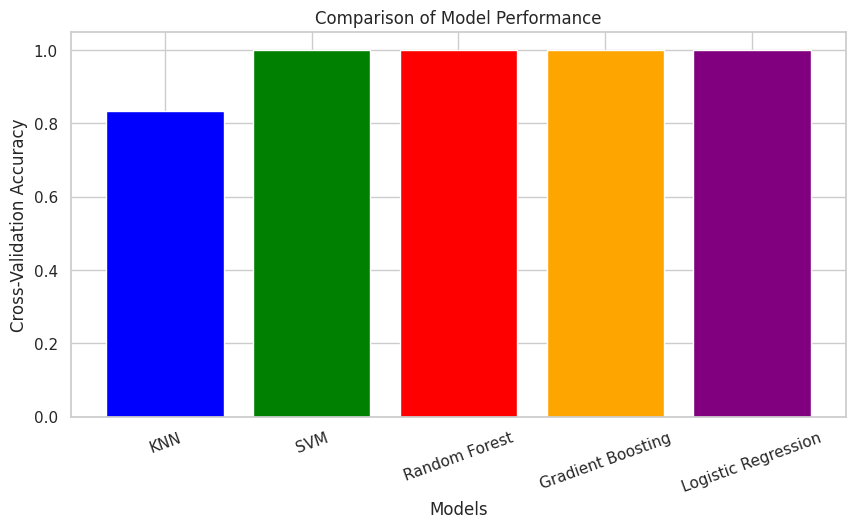

In [23]:
# n'importiw matplotlib باش نديرو graphique
import matplotlib.pyplot as plt

# njibou les noms ta3 les modèles men le dict best_scores
models = list(best_scores.keys())

# njibou les scores (ta3 cross-validation) ta3 kol modèle
scores = list(best_scores.values())

# na3tiw taille ta3 la figure (10 sur 5)
plt.figure(figsize=(10, 5))

# ndirou graphique type bar, chaque modèle 3andou score
plt.bar(models, scores, color=['blue', 'green', 'red', 'orange', 'purple'])

# nom ta3 l'axe X
plt.xlabel("Models")

# nom ta3 l'axe Y
plt.ylabel("Cross-Validation Accuracy")

# titre ta3 la figure
plt.title("Comparison of Model Performance")

# ndirou rotation bch les noms ma ytkharbouch
plt.xticks(rotation=20)

# n'affichiw le graphique
plt.show()


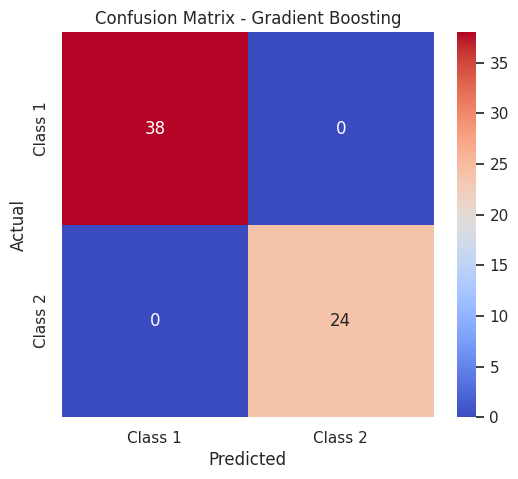

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Extract the Gradient Boosting model from best_models
best_model_name = "Gradient Boosting"
best_model = best_models[best_model_name]

# Predict on the test set
y_pred = best_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", 
            xticklabels=["Class 1", "Class 2"], 
            yticklabels=["Class 1", "Class 2"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

In [25]:
from sklearn.metrics import accuracy_score

# ndirou boucle 3la chaque modèle fi best_models
for name, model in best_models.items():
    # npredictiw les classes ta3 X_test
    y_pred = model.predict(X_test)
    
    # ncalculiw score ta3 accuracy bin les vraies classes w les prédictions
    test_score = accuracy_score(y_test, y_pred)
    
    # naffichiw score ta3 chaque modèle
    print(f" {name} - Score sur test: {test_score:.4f}")


 KNN - Score sur test: 0.7581
 SVM - Score sur test: 1.0000
 Random Forest - Score sur test: 1.0000
 Gradient Boosting - Score sur test: 1.0000
 Logistic Regression - Score sur test: 1.0000


In [26]:
import os
import joblib
save_dir = '/kaggle/working/'
models_path = os.path.join(save_dir, 'Mesothelioma_model.pkl')
joblib.dump(best_models, models_path)
print(f"Modèles sauvegardés : {models_path}")

Modèles sauvegardés : /kaggle/working/Mesothelioma_model.pkl


In [27]:
import joblib
joblib.dump(best_models["Gradient Boosting"], "Gradient Boosting_model.pkl")
print("Modèle Gradient Boosting enregistré sous 'Gradient Boosting_model.pkl'.")


Modèle Gradient Boosting enregistré sous 'Gradient Boosting_model.pkl'.


In [7]:
import pandas as pd
from io import StringIO

# hadhom les chemins ta3 les fichiers CSV li tsajlou fihom les données train/test
train_path = "/kaggle/working/train_data.csv"
test_path = "/kaggle/working/test_data.csv"

# nqraw les fichiers CSV w nhottouhom f DataFrame
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# ndir copie men train_df bach nkhdem 3liha
df = train_df.copy()


In [10]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Ndanno bellli 3andna DataFrame smitha df
# N7eydo menha la colonne "class of diagnosis" bach nb9aw gha b les variables d'entrée (features)
features = df.drop(columns=['class of diagnosis'])

# Hna khdina la colonne ta3 la classe wahdaha (label)
conditions = df['class of diagnosis'].values

# Normalisation ta3 les données bach ykounou bin 0 w 1
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Rahi wellat les données normalisées en format tf.Tensor 
real_data = tf.convert_to_tensor(features_scaled, dtype=tf.float32)

# Dok ndirou les classes en one-hot encoding
# tf.one_hot tetbeddel chaque valeur (label) l vector fiha gha un seul 1
# par exemple 1 ➝ [1, 0],  2 ➝ [0, 1]
# 7na drna -1 3la les labels 7it tf.one_hot ybda mn 0, ma y9belch ybda mn 1
# donc : 1 ➝ 0, 2 ➝ 1, w b had tari9a tf.one_hot ykhdem normal
conditions = tf.one_hot(conditions - 1, depth=2)  # depth=2 7it 3andna 2 classes


In [11]:
# Nombre de dimensions ta3 le bruit li rah ydkhl l'input ta3 le générateur
# ce bruit houwa li ykhdem bih le générateur bach ykhalq des données synthétiques
noise_dim = 100  # yani on va générer un vecteur de taille 100 comme bruit

# Nombre de variables (colonnes) ta3 les données originales après normalisation
# (features_scaled rah tableau avec les données d'entrée)
data_dim = features_scaled.shape[1]  # hna rahna njibo combien de colonnes kaynin dans les features

# Nombre de classes possibles dans la variable cible
# (dans notre cas : 1 ou 2, donc 2 classes ➝ one-hot encoding ykoun 2 valeurs)
condition_dim = 2  # donc one-hot [1, 0] ou [0, 1], selon la classe


In [12]:
def build_generator():
    # Input te3  noise (vecteur sghir li fih random values)
    noise_input = tf.keras.layers.Input(shape=(noise_dim,))
    
    # Input dial la condition (yani la classe one-hot encoded)
    condition_input = tf.keras.layers.Input(shape=(condition_dim,))
    
    # Nconcateniw noise m3a la condition (li howa ydirna génération conditionnée)
    x = tf.keras.layers.Concatenate()([noise_input, condition_input])

    # Premier couche Dense (fully connected)
    x = tf.keras.layers.Dense(256)(x)
    
    # Fonction d’activation LeakyReLU
    # tkhalli les valeurs négatives ydouzou b chi qima m9allla (alpha * x), hna alpha = 0.2
# khir men ReLU li katb9a t9ta3 les valeurs négatives (x < 0 ➝ 0), li ydir "neurones morts"
# LeakyReLU mlih f les GANs 7it training dyalhom kaykon instable, w hadi t3awn bach ykoun stable w les neurones yb9aw ykhdmou

    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)

   # BatchNormalization tdir tawazoun fel activations w tna9ess men l'variations bach tserra3 l'apprentissage
    # moyenne de 0 et une variance de 1.
    x = tf.keras.layers.BatchNormalization()(x)

    # Deuxième couche Dense
    x = tf.keras.layers.Dense(512)(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    x = tf.keras.layers.BatchNormalization()(x)

    # Troisième couche Dense
    x = tf.keras.layers.Dense(256)(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    x = tf.keras.layers.BatchNormalization()(x)

    # Couche finale (output) – linear output bach ykoun 3andna plus de flexibilité
    # Mahadich fonction d’activation f l’output (par exemple pas de sigmoid)
    # 7it les données normalisées déjà entre 0 w 1 par MinMaxScaler
    x = tf.keras.layers.Dense(data_dim)(x)

    # Construction du modèle avec les deux inputs (noise w condition)
    model = tf.keras.Model([noise_input, condition_input], x)
    return model

# Initialisation du générateur
generator = build_generator()

# Affichage du résumé du modèle
generator.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 2)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 102)            │              0 │ input_layer[0][0],     │
│                           │                        │                │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │         26,368 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu (LeakyReLU)   │ (None, 256)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 256)            │          1,024 │ leaky_re_lu[0][0]      │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 512)            │        131,584 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_1 (LeakyReLU) │ (None, 512)            │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 512)            │          2,048 │ leaky_re_lu_1[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 256)            │        131,328 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_2 (LeakyReLU) │ (None, 256)            │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 256)            │          1,024 │ leaky_re_lu_2[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 34)             │          8,738 │ batch_normalization_2… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 302,114 (1.15 MB)

 Trainable params: 300,066 (1.14 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [13]:
def build_discriminator():
    # Input dial les données (soit réelles, soit générées)
    data_input = tf.keras.layers.Input(shape=(data_dim,))

    # Input dial la condition (par exemple la classe one-hot encoded)
    condition_input = tf.keras.layers.Input(shape=(condition_dim,))

    # Nconcateniw les deux inputs bach ykoun l’entrée conditionnée
    # hadchi ydir discriminator conditionné (CGAN)
    x = tf.keras.layers.Concatenate()([data_input, condition_input])

    # Première couche Dense avec 256 neurones
    # hiya li t9ra l’entrée complète (data + condition)
    x = tf.keras.layers.Dense(256)(x)

    # Fonction d’activation LeakyReLU
    # tkhalli les valeurs négatives ydouzou b chi qima m9allla (alpha * x), hna alpha = 0.2
    # khir men ReLU li katkhatem les valeurs négatives (x < 0 ➝ 0), li ydir "neurones morts"
    # w hadi mliha f GANs 7it training dyalhom kaykon instable
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)

    # Dropout bach ndir régularisation (kat7mi mn overfitting)
    # hna 30% men les neurones ytw9fou b forma random f kol passage
    x = tf.keras.layers.Dropout(0.3)(x)

    # Deuxième couche Dense avec 128 neurones
    # katzid tfahem plus sur les patterns entre les données w les conditions
    x = tf.keras.layers.Dense(128)(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)

    # Encore Dropout bach ma n5allich l’model ytwakkal 3la chi neurones ma3yinine
    # kol wa9t bach kol neurone ywalli qawi wahdou w le modèle ykoun plus général, stable, w y3ref ytraite ay donnée.
    x = tf.keras.layers.Dropout(0.3)(x)

    # Output final : une seule valeur (logit) li kat9iss wach la donnée vraie ou générée
    # pas de fonction d’activation hna, 7it on va utiliser `from_logits=True` f la loss
    x = tf.keras.layers.Dense(1)(x)

    # Création du modèle discriminator
    model = tf.keras.Model([data_input, condition_input], x)
    return model

# Initialisation du discriminateur
discriminator = build_discriminator()

# Affichage du résumé
discriminator.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 34)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 2)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 36)             │              0 │ input_layer_2[0][0],   │
│ (Concatenate)             │                        │                │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 256)            │          9,472 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_3 (LeakyReLU) │ (None, 256)            │              0 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256)            │              0 │ leaky_re_lu_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 128)            │         32,896 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_4 (LeakyReLU) │ (None, 128)            │              0 │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128)            │              0 │ leaky_re_lu_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 1)              │            129 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 42,497 (166.00 KB)

 Trainable params: 42,497 (166.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
#On utilise Adam bach ntrainiw les poids te3 le générateur et discriminateur .
# 1e-4’est le learning rate (kifach ybadl les poids, ici valeur petite 0.0001 bach n7afdou 3la stabilité).
#beta generalement est 0,9 par défaut dans Adam ,
generator_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)
#cross_entropy kat9iss l’erreur dyal classification binaire entre vraies données et générées.
#logit c'est un valeur brut qui est l'output de discrimanateur li y7taj une activation fonction sigmoid 
#hna derna binarycrossentropy+ sigmoid a l'interieur (from_logits=True)
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [15]:
# hadi tf.function tkhali fonction tkhadem b zrba
@tf.function
def train_discriminator(real_data, conditions, batch_size):
     # n7ato  bruit (input ta3 generator) b shape te3 batch
    noise = tf.random.normal([batch_size, noise_dim])
    # ndirou données fakées men generator b chourout (condition)
    fake_data = generator([noise, conditions], training=True)
    with tf.GradientTape() as tape:
        # discriminator ykhdem 3la données vrais (réelles)
        real_output = discriminator([real_data, conditions], training=True)
         # discriminator ykhdem 3la données fakées
        fake_output = discriminator([fake_data, conditions], training=True)
       # label smoothing On remplace 1 par 0.9 pour les vraies données 
        # On remplace 0 par 0.1 pour les fausses données
        #Éviter que le discriminateur soit trop confiant (ce qui pourrait bloquer le générateur)
         # perte 3la données vrais b label smoothing (0.9 au lieu de 1)
        real_loss = cross_entropy(tf.ones_like(real_output) * 0.9, real_output)  # Label smoothing
        # perte 3la données fakées b label smoothing (0.1 au lieu de 0)
        fake_loss = cross_entropy(tf.zeros_like(fake_output) + 0.1, fake_output)  # Label smoothing
        #loss total
        total_loss = real_loss + fake_loss
    # nhsb gradients ta3 perte totale par rapport chaque  poid te3  discriminator
    gradients = tape.gradient(total_loss, discriminator.trainable_variables)
      # met à jour les poids ta3 le discriminateur avec Adam, selon les gradients calculés.
    discriminator_optimizer.apply_gradients(zip(gradients, discriminator.trainable_variables))
    return total_loss

In [16]:
@tf.function
def train_generator(conditions, batch_size):
     #On génère noise (z3ma latent vector) d’une taille batch_size × noise_dim.
    noise = tf.random.normal([batch_size, noise_dim])
    #outil li ykhdem l’enregistrement automatique ta3 les opérations
    #باش n9adro ncalculiw le gradient (dérivées).
    with tf.GradientTape() as tape:
        #Ydir generation ta3 les données fausses (fake)
        #training=True ykhdem aussi les layers comme Dropout ou BatchNorm correctement.
        fake_data = generator([noise, conditions], training=True)
        
        #Rani nwari le discriminateur ces données yqder y3ref beli hadi machi réelle
        #Si le discriminateur y3ref que c’est fake ➝ perte ta3 le générateur tzid wl3eks 
        fake_output = discriminator([fake_data, conditions], training=True)
        #rananhsbo fperte idha gal discriminateur 1 whiya 1 loss tkon sghura wl3eks 
        loss = cross_entropy(tf.ones_like(fake_output), fake_output)
        #on calcule le gradient ta3 la loss par rapport les paramètres ta3 le générateur.
    gradients = tape.gradient(loss, generator.trainable_variables)
    # met à jour les poids ta3 le générateur avec Adam, selon les gradients calculés.
    generator_optimizer.apply_gradients(zip(gradients, generator.trainable_variables))
    return loss

In [36]:
d_losses = []
g_losses = []
epochs = 7000
batch_size = 32
#signifie qu’on entraîne le discriminateur seulement une fois toutes les 2 epouches.
#katkhalina mantrainiwch l'discriminator bzaaf bach mayt9awach bzaaf 3la generator.
n_critic = 2  # Train discriminator every n_critic steps

for epoch in range(epochs):
    #Hna rah kaydkhl l'GAN ykhtar batch_size dyal lignes mn les données réelles b façon random
    idx = np.random.randint(0, real_data.shape[0], batch_size)
    #Hna rah kaybddl idx mn tableau numpy vers TensorFlow tensor b format int32,
    idx_tensor = tf.convert_to_tensor(idx, dtype=tf.int32)
    # Hna rah kayjbd mn real_data ghi les valeurs li 3tina f idx_tensor.
    real_batch = tf.gather(real_data, idx_tensor)
    # # Hna rah kayjbd mn condition ghi les valeurs li 3tina f idx_tensor.
    condition_batch = tf.gather(conditions, idx_tensor)

    # Train discriminator
    if epoch % n_critic == 0:
        d_loss = train_discriminator(real_batch, condition_batch, batch_size)
    else:
        d_loss = tf.constant(0.0)  # Skip discriminator update
    # Train generator
    g_loss = train_generator(condition_batch, batch_size)

    # Store losses
    d_losses.append(d_loss.numpy())
    g_losses.append(g_loss.numpy())

    # Print progress
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss.numpy():.4f}, G Loss: {g_loss.numpy():.4f}")

Epoch 0, D Loss: 1.6812, G Loss: 1.0520
Epoch 500, D Loss: 0.9705, G Loss: 1.4313
Epoch 1000, D Loss: 1.2068, G Loss: 1.1020
Epoch 1500, D Loss: 1.1503, G Loss: 0.9332
Epoch 2000, D Loss: 1.3006, G Loss: 0.7884
Epoch 2500, D Loss: 1.4070, G Loss: 0.7546
Epoch 3000, D Loss: 1.4258, G Loss: 0.6411
Epoch 3500, D Loss: 1.4102, G Loss: 0.6867
Epoch 4000, D Loss: 1.4336, G Loss: 0.7190
Epoch 4500, D Loss: 1.3891, G Loss: 0.6859
Epoch 5000, D Loss: 1.3862, G Loss: 0.6921
Epoch 5500, D Loss: 1.3893, G Loss: 0.7043
Epoch 6000, D Loss: 1.4020, G Loss: 0.6828
Epoch 6500, D Loss: 1.3804, G Loss: 0.6767


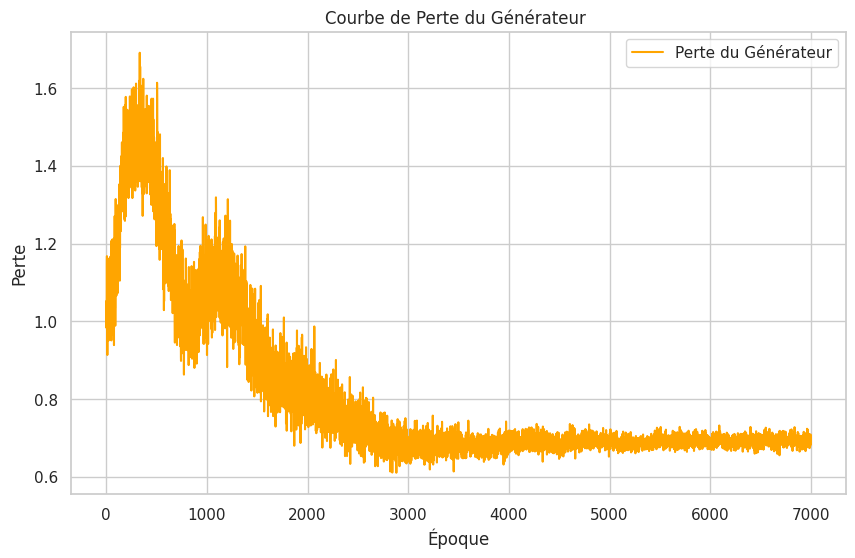

In [37]:
# Tracer les courbes des pertes
plt.figure(figsize=(10, 6))

plt.plot(g_losses, label='Perte du Générateur', color='orange')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.title('Courbe de Perte du Générateur ')
plt.legend()
plt.grid(True)
plt.savefig('/kaggle/working/loss_curves_updated.png')
plt.show()

In [38]:
generator.save('/kaggle/working/generator_model_mésothéliome.h5')

In [39]:
#num sample :  nombre d'exemples (échantillons) li bghiti générer avec le générateur.
def generate_synthetic_data(generator, num_samples, class_label):
    # Générer du bruit et les conditions
    noise = tf.random.normal([num_samples, noise_dim])
    condition = tf.one_hot([class_label - 1] * num_samples, depth=condition_dim)
    
    # Générer les données synthétiques
    synthetic_data = generator([noise, condition], training=False)
    
    # Appliquer la transformation inverse du scaler
    #Hna rah kayraja3 les données synthétiques l’échelle originale.
    synthetic_data = scaler.inverse_transform(synthetic_data.numpy())
    
    # Créer un DataFrame avec les colonnes des caractéristiques
    synthetic_df = pd.DataFrame(synthetic_data, columns=features.columns)
    
    # Identifier les colonnes binaires ou continues à seuiller
    # (par exemple, les colonnes qui devraient être binaires dans le jeu de données original)
    binary_cols = [
        'gender', 'dead or not', 'hemoglobin (HGB)', 'performance status', 
        'weakness', 'ache on chest', 'dyspnoea', 'cytology', 'diagnosis method', 
        'asbestos exposure'
    ]  # Ajustez cette liste selon votre jeu de données
    
    # Appliquer le seuillage : ≤ 0.5 → 0, ≥ 0.5 → 1
    for col in binary_cols:
        if col in synthetic_df.columns:
            synthetic_df[col] = synthetic_df[col].apply(lambda x: 0 if x <= 0.5 else 1)
    
    # Ajouter la colonne de classe
    synthetic_df['class of diagnosis'] = class_label
    
    return synthetic_df

In [17]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import os
import tensorflow as tf

# Chemin vers le modèle générateur
generator_path = '/kaggle/working/generator_model_mésothéliome.h5'

# Vérifier que le fichier du générateur existe
if not os.path.exists(generator_path):
    raise FileNotFoundError(f"Le fichier du générateur n'a pas été trouvé au chemin {generator_path}")

# Charger le modèle générateur
generator = load_model(generator_path)
print("Modèle générateur chargé avec succès.")

def generate_synthetic_data(generator, num_samples, class_label):
    # Générer du bruit et les conditions
    noise = tf.random.normal([num_samples, noise_dim])
    condition = tf.one_hot([class_label - 1] * num_samples, depth=condition_dim)
    
    # Générer les données synthétiques
    synthetic_data = generator([noise, condition], training=False)
    
    # Appliquer la transformation inverse du scaler
    synthetic_data = scaler.inverse_transform(synthetic_data.numpy())
    
    # Créer un DataFrame avec les colonnes des caractéristiques
    synthetic_df = pd.DataFrame(synthetic_data, columns=features.columns)
    
    # Identifier les colonnes binaires ou continues à seuiller
    # (par exemple, les colonnes qui devraient être binaires dans le jeu de données original)
    binary_cols = [
        'gender', 'dead or not', 'hemoglobin (HGB)', 'performance status', 
        'weakness', 'ache on chest', 'dyspnoea', 'cytology', 'diagnosis method', 
        'asbestos exposure'
    ]  # Ajustez cette liste selon votre jeu de données
    
    # Appliquer le seuillage : ≤ 0.5 → 0, ≥ 0.5 → 1
    for col in binary_cols:
        if col in synthetic_df.columns:
            synthetic_df[col] = synthetic_df[col].apply(lambda x: 0 if x <= 0.5 else 1)
    
    # Ajouter la colonne de classe
    synthetic_df['class of diagnosis'] = class_label
    
    return synthetic_df

# Générer des données synthétiques pour les deux classes
synthetic_class_1 = generate_synthetic_data(generator, 1000, 1)  # 1000 lignes pour la classe 1
synthetic_class_2 = generate_synthetic_data(generator, 1000, 2)  # 1000 lignes pour la classe 2

# Combiner et mélanger les données
synthetic_combined = pd.concat([synthetic_class_1, synthetic_class_2], ignore_index=True)
synthetic_combined = synthetic_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Sauvegarder les données synthétiques
synthetic_combined.to_csv('/kaggle/working/synthetic_data_mésothéliome_1000.csv', index=False)
print("Données synthétiques générées et sauvegardées dans '/kaggle/working/synthetic_data_mésothéliome.csv'.")

Modèle générateur chargé avec succès.
Données synthétiques générées et sauvegardées dans '/kaggle/working/synthetic_data_mésothéliome.csv'.


In [23]:
import joblib
from sklearn.metrics import accuracy_score, classification_report
import os

# Chemin vers le modèle entraîné
model_path = "/kaggle/working/Gradient Boosting_model.pkl"

# Vérifier que le fichier existe
if os.path.exists(model_path):
    # Charger le modèle
    model = joblib.load(model_path)
    print("Modèle chargé avec succès.\n")
    
    # Données réelles
    X_test = test_df.drop(columns=['class of diagnosis'])
    y_test = test_df['class of diagnosis']

    predictions_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, predictions_test)
    print(f"Exactitude sur les données de test réelles : {accuracy_test:.4f}")
    print("\nRapport de classification (test réel) :")
    print(classification_report(y_test, predictions_test, target_names=['Classe 1', 'Classe 2']))

    # Données synthétiques
    X_synthetic = synthetic_combined.drop(columns=['class of diagnosis'])
    # Réordonner les colonnes pour qu'elles correspondent à celles utilisées lors de l'entraînement
    X_synthetic = X_synthetic[model.feature_names_in_]

    y_synthetic = synthetic_combined['class of diagnosis']
    predictions_synthetic = model.predict(X_synthetic)
    accuracy_synthetic = accuracy_score(y_synthetic, predictions_synthetic)
    print(f"\nExactitude sur les données synthétiques : {accuracy_synthetic:.4f}")
    print("\nRapport de classification (synthétiques) :")
    print(classification_report(y_synthetic, predictions_synthetic, target_names=['Classe 1', 'Classe 2']))

else:
    print(f"Erreur : le fichier du modèle n'a pas été trouvé au chemin {model_path}")

Modèle chargé avec succès.

Exactitude sur les données de test réelles : 1.0000

Rapport de classification (test réel) :
              precision    recall  f1-score   support

    Classe 1       1.00      1.00      1.00        38
    Classe 2       1.00      1.00      1.00        24

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62


Exactitude sur les données synthétiques : 1.0000

Rapport de classification (synthétiques) :
              precision    recall  f1-score   support

    Classe 1       1.00      1.00      1.00      1000
    Classe 2       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [19]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import os
import tensorflow as tf

# Chemin vers le modèle générateur
generator_path = '/kaggle/working/generator_model_mésothéliome.h5'

# Vérifier que le fichier du générateur existe
if not os.path.exists(generator_path):
    raise FileNotFoundError(f"Le fichier du générateur n'a pas été trouvé au chemin {generator_path}")

# Charger le modèle générateur
generator = load_model(generator_path)
print("Modèle générateur chargé avec succès.")

def generate_synthetic_data(generator, num_samples, class_label):
    # Générer du bruit et les conditions
    noise = tf.random.normal([num_samples, noise_dim])
    condition = tf.one_hot([class_label - 1] * num_samples, depth=condition_dim)
    
    # Générer les données synthétiques
    synthetic_data = generator([noise, condition], training=False)
    
    # Appliquer la transformation inverse du scaler
    synthetic_data = scaler.inverse_transform(synthetic_data.numpy())
    
    # Créer un DataFrame avec les colonnes des caractéristiques
    synthetic_df = pd.DataFrame(synthetic_data, columns=features.columns)
    
    # Identifier les colonnes binaires ou continues à seuiller
    # (par exemple, les colonnes qui devraient être binaires dans le jeu de données original)
    binary_cols = [
        'gender', 'dead or not', 'hemoglobin (HGB)', 'performance status', 
        'weakness', 'ache on chest', 'dyspnoea', 'cytology', 'diagnosis method', 
        'asbestos exposure'
    ]  # Ajustez cette liste selon votre jeu de données
    
    # Appliquer le seuillage : ≤ 0.5 → 0, ≥ 0.5 → 1
    for col in binary_cols:
        if col in synthetic_df.columns:
            synthetic_df[col] = synthetic_df[col].apply(lambda x: 0 if x <= 0.5 else 1)
    
    # Ajouter la colonne de classe
    synthetic_df['class of diagnosis'] = class_label
    
    return synthetic_df

# Générer des données synthétiques pour les deux classes
synthetic_class_1 = generate_synthetic_data(generator, 10000, 1)  # 10000 lignes pour la classe 1
synthetic_class_2 = generate_synthetic_data(generator, 10000, 2)  # 10000 lignes pour la classe 2

# Combiner et mélanger les données
synthetic_combined_1= pd.concat([synthetic_class_1, synthetic_class_2], ignore_index=True)
synthetic_combined_1 = synthetic_combined_1.sample(frac=1, random_state=42).reset_index(drop=True)

# Sauvegarder les données synthétiques
synthetic_combined_1.to_csv('/kaggle/working/synthetic_data_mésothéliome_10000.csv', index=False)
print("Données synthétiques générées et sauvegardées dans '/kaggle/working/synthetic_data_mésothéliome.csv'.")

Modèle générateur chargé avec succès.
Données synthétiques générées et sauvegardées dans '/kaggle/working/synthetic_data_mésothéliome.csv'.


In [22]:
import joblib
from sklearn.metrics import accuracy_score, classification_report
import os

# Chemin vers le modèle entraîné
model_path = "/kaggle/working/Gradient Boosting_model.pkl"

# Vérifier que le fichier existe
if os.path.exists(model_path):
    # Charger le modèle
    model = joblib.load(model_path)
    print("Modèle chargé avec succès.\n")
    
    # Données réelles
    X_test = test_df.drop(columns=['class of diagnosis'])
    y_test = test_df['class of diagnosis']

    predictions_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, predictions_test)
    print(f"Exactitude sur les données de test réelles : {accuracy_test:.4f}")
    print("\nRapport de classification (test réel) :")
    print(classification_report(y_test, predictions_test, target_names=['Classe 1', 'Classe 2']))

    # Données synthétiques
    X_synthetic = synthetic_combined_1.drop(columns=['class of diagnosis'])
    # Réordonner les colonnes pour qu'elles correspondent à celles utilisées lors de l'entraînement
    X_synthetic = X_synthetic[model.feature_names_in_]

    y_synthetic = synthetic_combined_1['class of diagnosis']
    predictions_synthetic = model.predict(X_synthetic)
    accuracy_synthetic = accuracy_score(y_synthetic, predictions_synthetic)
    print(f"\nExactitude sur les données synthétiques : {accuracy_synthetic:.4f}")
    print("\nRapport de classification (synthétiques) :")
    print(classification_report(y_synthetic, predictions_synthetic, target_names=['Classe 1', 'Classe 2']))

else:
    print(f"Erreur : le fichier du modèle n'a pas été trouvé au chemin {model_path}")

Modèle chargé avec succès.

Exactitude sur les données de test réelles : 1.0000

Rapport de classification (test réel) :
              precision    recall  f1-score   support

    Classe 1       1.00      1.00      1.00        38
    Classe 2       1.00      1.00      1.00        24

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62


Exactitude sur les données synthétiques : 0.9999

Rapport de classification (synthétiques) :
              precision    recall  f1-score   support

    Classe 1       1.00      1.00      1.00     10000
    Classe 2       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [24]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import os
import tensorflow as tf

# Chemin vers le modèle générateur
generator_path = '/kaggle/working/generator_model_mésothéliome.h5'

# Vérifier que le fichier du générateur existe
if not os.path.exists(generator_path):
    raise FileNotFoundError(f"Le fichier du générateur n'a pas été trouvé au chemin {generator_path}")

# Charger le modèle générateur
generator = load_model(generator_path)
print("Modèle générateur chargé avec succès.")

def generate_synthetic_data(generator, num_samples, class_label):
    # Générer du bruit et les conditions
    noise = tf.random.normal([num_samples, noise_dim])
    condition = tf.one_hot([class_label - 1] * num_samples, depth=condition_dim)
    
    # Générer les données synthétiques
    synthetic_data = generator([noise, condition], training=False)
    
    # Appliquer la transformation inverse du scaler
    synthetic_data = scaler.inverse_transform(synthetic_data.numpy())
    
    # Créer un DataFrame avec les colonnes des caractéristiques
    synthetic_df = pd.DataFrame(synthetic_data, columns=features.columns)
    
    # Identifier les colonnes binaires ou continues à seuiller
    # (par exemple, les colonnes qui devraient être binaires dans le jeu de données original)
    binary_cols = [
        'gender', 'dead or not', 'hemoglobin (HGB)', 'performance status', 
        'weakness', 'ache on chest', 'dyspnoea', 'cytology', 'diagnosis method', 
        'asbestos exposure'
    ]  # Ajustez cette liste selon votre jeu de données
    
    # Appliquer le seuillage : ≤ 0.5 → 0, ≥ 0.5 → 1
    for col in binary_cols:
        if col in synthetic_df.columns:
            synthetic_df[col] = synthetic_df[col].apply(lambda x: 0 if x <= 0.5 else 1)
    
    # Ajouter la colonne de classe
    synthetic_df['class of diagnosis'] = class_label
    
    return synthetic_df

# Générer des données synthétiques pour les deux classes
synthetic_class_1 = generate_synthetic_data(generator, 100000, 1)  # 10000 lignes pour la classe 1
synthetic_class_2 = generate_synthetic_data(generator, 100000, 2)  # 10000 lignes pour la classe 2

# Combiner et mélanger les données
synthetic_combined_2= pd.concat([synthetic_class_1, synthetic_class_2], ignore_index=True)
synthetic_combined_2 = synthetic_combined_1.sample(frac=1, random_state=42).reset_index(drop=True)

# Sauvegarder les données synthétiques
synthetic_combined_2.to_csv('/kaggle/working/synthetic_data_mésothéliome_100000.csv', index=False)
print("Données synthétiques générées et sauvegardées dans '/kaggle/working/synthetic_data_mésothéliome100000.csv'.")

Modèle générateur chargé avec succès.
Données synthétiques générées et sauvegardées dans '/kaggle/working/synthetic_data_mésothéliome100000.csv'.


In [25]:
import joblib
from sklearn.metrics import accuracy_score, classification_report
import os

# Chemin vers le modèle entraîné
model_path = "/kaggle/working/Gradient Boosting_model.pkl"

# Vérifier que le fichier existe
if os.path.exists(model_path):
    # Charger le modèle
    model = joblib.load(model_path)
    print("Modèle chargé avec succès.\n")
    
    # Données réelles
    X_test = test_df.drop(columns=['class of diagnosis'])
    y_test = test_df['class of diagnosis']

    predictions_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, predictions_test)
    print(f"Exactitude sur les données de test réelles : {accuracy_test:.4f}")
    print("\nRapport de classification (test réel) :")
    print(classification_report(y_test, predictions_test, target_names=['Classe 1', 'Classe 2']))

    # Données synthétiques
    X_synthetic = synthetic_combined_2.drop(columns=['class of diagnosis'])
    # Réordonner les colonnes pour qu'elles correspondent à celles utilisées lors de l'entraînement
    X_synthetic = X_synthetic[model.feature_names_in_]

    y_synthetic = synthetic_combined_2['class of diagnosis']
    predictions_synthetic = model.predict(X_synthetic)
    accuracy_synthetic = accuracy_score(y_synthetic, predictions_synthetic)
    print(f"\nExactitude sur les données synthétiques : {accuracy_synthetic:.4f}")
    print("\nRapport de classification (synthétiques) :")
    print(classification_report(y_synthetic, predictions_synthetic, target_names=['Classe 1', 'Classe 2']))

else:
    print(f"Erreur : le fichier du modèle n'a pas été trouvé au chemin {model_path}")

Modèle chargé avec succès.

Exactitude sur les données de test réelles : 1.0000

Rapport de classification (test réel) :
              precision    recall  f1-score   support

    Classe 1       1.00      1.00      1.00        38
    Classe 2       1.00      1.00      1.00        24

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62


Exactitude sur les données synthétiques : 0.9999

Rapport de classification (synthétiques) :
              precision    recall  f1-score   support

    Classe 1       1.00      1.00      1.00     10000
    Classe 2       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [62]:
# Générer des données synthétiques pour les deux classes
synthetic_class_1 = generate_synthetic_data(generator, 500000, 1)
synthetic_class_2 = generate_synthetic_data(generator, 500000, 2)

# Combiner et mélanger les données
synthetic_combined = pd.concat([synthetic_class_1, synthetic_class_2], ignore_index=True)
synthetic_combined = synthetic_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Sauvegarder les données
synthetic_combined.to_csv('/kaggle/working/synthetic_data_mésothéliome.csv', index=False)

In [63]:
import joblib
from sklearn.metrics import accuracy_score, classification_report
import os

# Chemin vers ton modèle entraîné
model_path = "/kaggle/working/Gradient Boosting_model.pkl"

# Vérifier que le fichier existe
if os.path.exists(model_path):
    # Charger le modèle
    model = joblib.load(model_path)
    print("Modèle chargé avec succès.\n")
    
    # Données réelles
    X_test = test_df.drop(columns=['class of diagnosis'])
    y_test = test_df['class of diagnosis']

    predictions_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, predictions_test)
    print(f"Exactitude sur les données de test réelles : {accuracy_test:.4f}")
    print("\nRapport de classification (test réel) :")
    print(classification_report(y_test, predictions_test, target_names=['Classe 1', 'Classe 2']))

    # Données synthétiques
    X_synthetic = synthetic_combined.drop(columns=['class of diagnosis'])
    # Réordonner les colonnes pour qu'elles correspondent à celles utilisées lors de l'entraînement
    X_synthetic = X_synthetic[model.feature_names_in_]

    y_synthetic = synthetic_combined['class of diagnosis']
    predictions_synthetic = model.predict(X_synthetic)
    accuracy_synthetic = accuracy_score(y_synthetic, predictions_synthetic)
    print(f"\nExactitude sur les données synthétiques : {accuracy_synthetic:.4f}")
    print("\nRapport de classification (synthétiques) :")
    print(classification_report(y_synthetic, predictions_synthetic, target_names=['Classe 1', 'Classe 2']))

else:
    print(f"Erreur : le fichier du modèle n'a pas été trouvé au chemin {model_path}")


Modèle chargé avec succès.

Exactitude sur les données de test réelles : 1.0000

Rapport de classification (test réel) :
              precision    recall  f1-score   support

    Classe 1       1.00      1.00      1.00        38
    Classe 2       1.00      1.00      1.00        24

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62


Exactitude sur les données synthétiques : 0.9999

Rapport de classification (synthétiques) :
              precision    recall  f1-score   support

    Classe 1       1.00      1.00      1.00    500000
    Classe 2       1.00      1.00      1.00    500000

    accuracy                           1.00   1000000
   macro avg       1.00      1.00      1.00   1000000
weighted avg       1.00      1.00      1.00   1000000



In [44]:

train_data = pd.read_csv('/kaggle/working/train_data.csv')
test_data = pd.read_csv('/kaggle/working/test_data.csv')


In [45]:
df = train_data.copy()
features = df.drop(columns=['class of diagnosis'])
conditions = df['class of diagnosis'].values

In [46]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
real_data = tf.convert_to_tensor(features_scaled, dtype=tf.float32)
conditions = tf.one_hot(conditions, depth=2)

In [47]:
data_dim = features_scaled.shape[1]
condition_dim = 2
latent_dim = 100

In [48]:
def build_encoder():
    data_input = tf.keras.layers.Input(shape=(data_dim,))
    condition_input = tf.keras.layers.Input(shape=(condition_dim,))
    x = tf.keras.layers.Concatenate()([data_input, condition_input])
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    mean = tf.keras.layers.Dense(latent_dim)(x)
    log_var = tf.keras.layers.Dense(latent_dim)(x)
    model = tf.keras.Model([data_input, condition_input], [mean, log_var])
    return model
encoder = build_encoder()
encoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 34)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5             │ (None, 2)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 36)             │              0 │ input_layer_4[0][0],   │
│ (Concatenate)             │                        │                │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 512)            │         18,944 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 256)            │        131,328 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 100)            │         25,700 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 100)            │         25,700 │ dense_8[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 201,672 (787.78 KB)

 Trainable params: 201,672 (787.78 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
def sampling(args):
    mean, log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.shape(mean)[0], latent_dim))
    return mean + tf.exp(0.5 * log_var) * epsilon

In [50]:
def build_decoder():
    latent_input = tf.keras.layers.Input(shape=(latent_dim,))
    condition_input = tf.keras.layers.Input(shape=(condition_dim,))
    x = tf.keras.layers.Concatenate()([latent_input, condition_input])
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dense(data_dim, activation='sigmoid')(x)
    model = tf.keras.Model([latent_input, condition_input], x)
    return model
decoder = build_decoder()
decoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_7             │ (None, 2)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 102)            │              0 │ input_layer_6[0][0],   │
│ (Concatenate)             │                        │                │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 256)            │         26,368 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 512)            │        131,584 │ dense_11[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 34)             │         17,442 │ dense_12[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 175,394 (685.13 KB)

 Trainable params: 175,394 (685.13 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
cross_entropy = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(1e-4)

In [52]:
@tf.function
def train_step(real_data, conditions):
    with tf.GradientTape() as tape:
        mean, log_var = encoder([real_data, conditions], training=True)
        z = sampling([mean, log_var])
        reconstructed = decoder([z, conditions], training=True)
        reconstruction_loss = cross_entropy(real_data, reconstructed)
        kl_loss = -0.5 * tf.reduce_mean(1 + log_var - tf.square(mean) - tf.exp(log_var))
        total_loss = reconstruction_loss + kl_loss
    gradients = tape.gradient(total_loss, encoder.trainable_variables + decoder.trainable_variables)
    optimizer.apply_gradients(zip(gradients, encoder.trainable_variables + decoder.trainable_variables))
    return total_loss

In [53]:
epochs = 20000
batch_size = 32
for epoch in range(epochs):
    idx = np.random.randint(0, real_data.shape[0], batch_size)
    real_batch = tf.gather(real_data, idx)
    condition_batch = tf.gather(conditions, idx)
    loss = train_step(real_batch, condition_batch)
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Sauvegarder le décodeur
decoder.save('tvae_decoder_cancer.h5')
print("Décodeur sauvegardé sous 'tvae_decoder_cancer.h5'")

Epoch 0, Loss: 0.7640
Epoch 500, Loss: 0.5475
Epoch 1000, Loss: 0.5200
Epoch 1500, Loss: 0.4897
Epoch 2000, Loss: 0.4851
Epoch 2500, Loss: 0.4832
Epoch 3000, Loss: 0.4757
Epoch 3500, Loss: 0.4550
Epoch 4000, Loss: 0.4561
Epoch 4500, Loss: 0.4601
Epoch 5000, Loss: 0.4573
Epoch 5500, Loss: 0.4652
Epoch 6000, Loss: 0.4384
Epoch 6500, Loss: 0.4619
Epoch 7000, Loss: 0.4440
Epoch 7500, Loss: 0.4208
Epoch 8000, Loss: 0.4340
Epoch 8500, Loss: 0.4404
Epoch 9000, Loss: 0.4420
Epoch 9500, Loss: 0.4566
Epoch 10000, Loss: 0.4245
Epoch 10500, Loss: 0.4394
Epoch 11000, Loss: 0.4195
Epoch 11500, Loss: 0.4311
Epoch 12000, Loss: 0.4188
Epoch 12500, Loss: 0.4097
Epoch 13000, Loss: 0.4393
Epoch 13500, Loss: 0.4105
Epoch 14000, Loss: 0.4243
Epoch 14500, Loss: 0.4162
Epoch 15000, Loss: 0.4151
Epoch 15500, Loss: 0.4263
Epoch 16000, Loss: 0.4130
Epoch 16500, Loss: 0.4017
Epoch 17000, Loss: 0.4257
Epoch 17500, Loss: 0.4065
Epoch 18000, Loss: 0.4220
Epoch 18500, Loss: 0.3953
Epoch 19000, Loss: 0.3947
Epoch 1950

In [54]:
def generate_synthetic_data_tvae(decoder, num_samples, class_label):
    condition_label = 2 if class_label == 1 else 1
    condition = tf.one_hot([condition_label - 1] * num_samples, depth=condition_dim)
    noise = tf.random.normal([num_samples, latent_dim])
    synthetic_data_tvae = decoder([noise, condition], training=False)
    synthetic_data_tvae = scaler.inverse_transform(synthetic_data_tvae.numpy())
    synthetic_df_tvae = pd.DataFrame(synthetic_data_tvae, columns=features.columns)
    synthetic_df_tvae['class of diagnosis'] = class_label
    return synthetic_df_tvae

In [55]:
synthetic_class_1_tvae = generate_synthetic_data_tvae(decoder, 100000, 1)
synthetic_class_2_tvae = generate_synthetic_data_tvae(decoder, 100000, 2)
synthetic_combined_tvae = pd.concat([synthetic_class_1_tvae, synthetic_class_2_tvae], ignore_index=True)
synthetic_combined_tvae = synthetic_combined_tvae.sample(frac=1, random_state=42).reset_index(drop=True)

synthetic_combined_tvae.to_csv('/kaggle/working/synthetic_data_tvae.csv', index=False)

In [56]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
#  Définition du chemin du modèle
model_path = "/kaggle/working/Gradient Boosting_model.pkl"
#  Chargement du modèle
try:
    model = joblib.load(model_path)
    print(" Modèle chargé avec succès !")
except Exception as e:
    print(f" Erreur lors du chargement du modèle : {e}")
    exit()  # Arrête le script si le modèle ne peut pas être chargé
#  Vérification et chargement des données test
try:
    test_path = "/kaggle/working/test_data.csv"
    test_df = pd.read_csv(test_path)
    # Supposons que la colonne cible s'appelle "class"
    X_test = test_df.drop(columns=['class of diagnosis'])
    y_test = test_df['class of diagnosis']
    print(" Données de test chargées avec succès !")
except Exception as e:
    print(f" Erreur lors du chargement des données de test : {e}")
    exit()
predictions_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, predictions_test)
print("\n **Évaluation sur les données réelles**")
print(f" Précision : {accuracy_test:.4f}")
print("\n Rapport de classification :")
print(classification_report(y_test, predictions_test, target_names=['Class 1', 'Class 2']))

# Step 7: Evaluate on synthetic data
X_synthetic_tvae = synthetic_combined_tvae.drop(columns=['class of diagnosis'])
y_synthetic_tvae = synthetic_combined_tvae['class of diagnosis']
predictions_synthetic_tvae = model.predict(X_synthetic_tvae)
accuracy_synthetic_tvae = accuracy_score(y_synthetic_tvae, predictions_synthetic_tvae)
print(f"Exactitude sur les données synthétiques : {accuracy_synthetic_tvae:.4f}")
print("\nRapport de classification (synthétiques) :")
print(classification_report(y_synthetic_tvae, predictions_synthetic_tvae, target_names=['Classe 1', 'Classe 2']))

 Modèle chargé avec succès !
 Données de test chargées avec succès !

 **Évaluation sur les données réelles**
 Précision : 1.0000

 Rapport de classification :
              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00        38
     Class 2       1.00      1.00      1.00        24

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62

Exactitude sur les données synthétiques : 1.0000

Rapport de classification (synthétiques) :
              precision    recall  f1-score   support

    Classe 1       1.00      1.00      1.00    100000
    Classe 2       1.00      1.00      1.00    100000

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

